In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 27974 files belonging to 15 classes.


In [3]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 7566 files belonging to 15 classes.


In [4]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_dataset:
    print (x, x.shape)
    print (y, y.shape)
    break



tf.Tensor(
[[[[ 77.    66.5   70.  ]
   [ 86.    77.    79.  ]
   [ 96.5   86.5   89.5 ]
   ...
   [ 99.25  89.25  96.25]
   [105.    94.   102.  ]
   [ 99.    89.5   96.  ]]

  [[162.   149.25 153.5 ]
   [179.25 166.5  170.75]
   [175.25 162.5  166.75]
   ...
   [187.75 176.75 184.75]
   [190.25 179.25 187.25]
   [187.25 176.25 184.25]]

  [[172.   155.   160.75]
   [172.   155.   160.75]
   [158.75 141.75 147.5 ]
   ...
   [186.   175.   183.  ]
   [186.25 175.25 183.25]
   [187.75 176.75 184.75]]

  ...

  [[145.25 124.25 131.25]
   [138.25 117.25 124.25]
   [132.25 111.25 118.25]
   ...
   [177.   164.   173.  ]
   [160.   147.   156.  ]
   [169.25 156.25 165.25]]

  [[138.5  117.5  124.5 ]
   [151.25 130.25 137.25]
   [155.25 134.25 141.25]
   ...
   [171.   158.   167.  ]
   [161.   148.   157.  ]
   [162.   149.   158.  ]]

  [[144.   123.   130.  ]
   [155.   134.   141.  ]
   [149.25 128.25 135.25]
   ...
   [156.75 143.75 152.75]
   [160.   147.   156.  ]
   [157.   144.   15

In [6]:
#buliding model
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
#building covo layer
model = Sequential()

In [9]:
model.add(Conv2D(filters=32, kernel_size=3,padding= 'same',activation= 'relu', input_shape= [128,128,3]))
#kernael size will decide size of matrix here is 3x3
#input size is same as image size ie 128
model.add(Conv2D(filters=32, kernel_size=3,padding= 'same',activation= 'relu'))
#adding another layer
#then we'll start pooling
model.add(MaxPool2D(pool_size=2, strides=2))

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
#now we will add these same layers again and again

In [11]:
model.add(Conv2D(filters=32, kernel_size=3,padding= 'same',activation= 'relu', input_shape= [128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,padding= 'same',activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=64, kernel_size=3,padding= 'same',activation= 'relu', ))
model.add(Conv2D(filters=64, kernel_size=3,padding= 'same',activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3,padding= 'same',activation= 'relu', ))
model.add(Conv2D(filters=128, kernel_size=3,padding= 'same',activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=256, kernel_size=3,padding= 'same',activation= 'relu', ))
model.add(Conv2D(filters=256, kernel_size=3,padding= 'same',activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=512, kernel_size=3,padding= 'same',activation= 'relu', ))
model.add(Conv2D(filters=512, kernel_size=3,padding= 'same',activation= 'relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
print(x.shape)  # This will print the shape of the output feature map


(32, 126, 126, 32)


In [17]:
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
print(x.shape)  # This will print the shape of the output feature map


(32, 124, 124, 32)


In [18]:
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
print(x.shape)  # This will print the shape of the output feature map


(32, 122, 122, 32)


In [19]:
model.add(Dropout(0.25)) #dropping 25% of neurons to avoid overfitting

In [20]:
#now convolution and pooling is done so we will flatten our output

In [21]:
model.add(Flatten())

In [22]:
#after flattening we'll add dense layer
from tensorflow.keras.layers import Dense, Activation


In [23]:
model.add(Dense(units=1500))
model.add(Activation('relu'))

In [24]:
model.add(Dropout(0.40))#40%

In [25]:
model.add(Dense(units=15))
model.add(Activation('softmax'))

In [26]:
#compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │        22,515 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15)             │             

 Total params: 7,826,735 (29.86 MB)

 Trainable params: 7,826,735 (29.86 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:

cnn = Sequential()



In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Create a Sequential model
cnn = Sequential()

# Add layers to your model using model.add(layer)
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))  # Adjust input shape for your data
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# ... Add more layers (Conv2D, MaxPooling2D, Flatten, Dense, etc.)


In [30]:

training_history = model.fit(x=training_dataset, validation_data=validation_dataset, epochs=10)


Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 415s 469ms/step - accuracy: 0.3155 - loss: 2.0328 - val_accuracy: 0.7289 - val_loss: 0.8866
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 569s 650ms/step - accuracy: 0.7657 - loss: 0.6968 - val_accuracy: 0.8362 - val_loss: 0.6203
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 536s 613ms/step - accuracy: 0.8700 - loss: 0.3889 - val_accuracy: 0.8463 - val_loss: 0.7154
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 1057s 1s/step - accuracy: 0.9110 - loss: 0.2646 - val_accuracy: 0.8333 - val_loss: 0.7869
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 546s 624ms/step - accuracy: 0.9270 - loss: 0.2120 - val_accuracy: 0.8746 - val_loss: 0.7290
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 535s 611ms/step - accuracy: 0.9482 - loss: 0.1472 - val_accuracy: 0.8764 - val_loss: 0.8263
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 689s 787ms/step - accuracy: 0.9596 - loss: 0.1221 - val_accuracy: 0.8832 - val_loss: 0.8360
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 638s 729ms/step - accuracy: 0.9646 - l

In [31]:
#model evaluation on training set
train_loss, train_acc = model.evaluate(training_dataset)

875/875 ━━━━━━━━━━━━━━━━━━━━ 128s 146ms/step - accuracy: 0.9931 - loss: 0.0236


In [32]:
print(train_loss, train_acc)

0.020005177706480026 0.9943519234657288


In [33]:
#model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_dataset)

237/237 ━━━━━━━━━━━━━━━━━━━━ 35s 145ms/step - accuracy: 0.9003 - loss: 0.8243


In [58]:
print(val_loss, val_acc)

0.8079320192337036 0.9043087363243103


In [59]:
training_history.history

{'accuracy': [0.5000357627868652,
  0.7972045540809631,
  0.8811753988265991,
  0.913598358631134,
  0.9351183176040649,
  0.9522413611412048,
  0.9588546752929688,
  0.9656824469566345,
  0.9708300828933716,
  0.9727604389190674],
 'loss': [1.494837999343872,
  0.6033155918121338,
  0.3580332398414612,
  0.25706079602241516,
  0.19016753137111664,
  0.14141780138015747,
  0.1236371174454689,
  0.10385791957378387,
  0.08642704039812088,
  0.08068075031042099],
 'val_accuracy': [0.7289188504219055,
  0.8362410664558411,
  0.8462859988212585,
  0.8333333134651184,
  0.8745704293251038,
  0.8764208555221558,
  0.8831614851951599,
  0.8811789751052856,
  0.8835580348968506,
  0.9043087363243103],
 'val_loss': [0.8865585923194885,
  0.6203175187110901,
  0.7154411673545837,
  0.7869215607643127,
  0.7289618253707886,
  0.8263240456581116,
  0.8360005021095276,
  0.7046337723731995,
  0.981988787651062,
  0.807931661605835]}

In [60]:
#saving model
model.save("trained_model.keras")

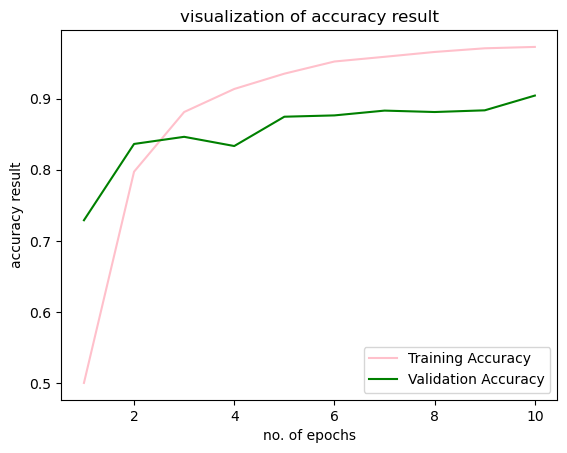

In [61]:
#accuracy visualisation
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'],color='pink', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='green', label='Validation Accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("accuracy result")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()

In [38]:
#some other metrics for model evaluation
class_name = validation_dataset.class_names
class_name

['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 7566 files belonging to 15 classes.


In [40]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step


(array([[2.3241109e-01, 3.7292259e-05, 2.4076742e-04, ..., 2.9293702e-07,
         5.8574060e-06, 1.4243057e-06],
        [9.9999511e-01, 9.3438688e-09, 1.7722508e-13, ..., 4.9259329e-06,
         8.0213173e-15, 3.5927529e-14],
        [1.0000000e+00, 1.5345478e-08, 3.7535699e-09, ..., 6.5464230e-13,
         8.2814132e-15, 2.8207186e-14],
        ...,
        [8.4387546e-09, 1.8737810e-06, 1.8869009e-07, ..., 2.4210271e-07,
         1.4118980e-05, 9.9972552e-01],
        [9.0155357e-12, 1.3512507e-08, 5.2369398e-10, ..., 9.9693476e-10,
         4.3302670e-08, 9.9999976e-01],
        [8.2875182e-12, 6.8899546e-11, 8.2521587e-11, ..., 3.4450214e-11,
         6.4554313e-09, 9.9999917e-01]], dtype=float32),
 (7566, 15))

In [5]:
predicted_categories = tf.argmax(y_pred, axis=1)

NameError: name 'tf' is not defined

In [6]:
predicted_categories

NameError: name 'predicted_categories' is not defined

In [43]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(7566, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
y_true = tf.argmax(true_categories, axis =1)
y_true

<tf.Tensor: shape=(7566,), dtype=int64, numpy=array([ 0,  0,  0, ..., 14, 14, 14], dtype=int64)>

In [45]:
from sklearn.metrics import classification_report, confusion_matrix


In [46]:
print(classification_report(y_true, predicted_categories, target_names= class_name))

                                               precision    recall  f1-score   support

                Pepper,_bell___Bacterial_spot       0.97      0.91      0.94       478
                       Pepper,_bell___healthy       0.96      0.99      0.97       497
                        Potato___Early_blight       0.96      0.98      0.97       485
                         Potato___Late_blight       0.93      0.97      0.95       485
                             Potato___healthy       0.97      0.99      0.98       456
                      Tomato___Bacterial_spot       0.99      0.96      0.97       425
                        Tomato___Early_blight       0.94      0.91      0.92       480
                         Tomato___Late_blight       0.62      0.94      0.75       463
                           Tomato___Leaf_Mold       0.97      0.75      0.85       600
                  Tomato___Septoria_leaf_spot       0.87      0.71      0.79       566
Tomato___Spider_mites Two-spotted_spider_m

In [47]:
cn = confusion_matrix(y_true, predicted_categories)
cn

array([[436,  10,   4,   3,   0,   0,   2,   1,   2,  16,   0,   0,   4,
          0,   0],
       [  1, 491,   0,   0,   1,   0,   0,   0,   2,   0,   0,   0,   1,
          1,   0],
       [  0,   0, 474,   8,   0,   0,   2,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   3, 469,   3,   0,   2,   8,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   0, 452,   0,   0,   1,   1,   1,   0,   0,   0,
          0,   0],
       [  0,   1,   0,   1,   1, 408,   1,   1,   0,   3,   0,   2,   4,
          2,   1],
       [  3,   0,   1,   5,   3,   0, 436,   9,   1,   8,   1,   6,   7,
          0,   0],
       [  1,   0,   2,   9,   0,   0,   9, 434,   0,   6,   0,   0,   1,
          0,   1],
       [  2,   0,   4,   4,   0,   0,   4, 122, 451,  12,   1,   0,   0,
          0,   0],
       [  2,   2,   6,   8,   0,   1,   3, 124,   3, 404,   1,   4,   0,
          6,   2],
       [  2,   1,   0,   0,   1,   0,   2,   0,   4,   4, 559,  21,   1,
       

<Axes: >

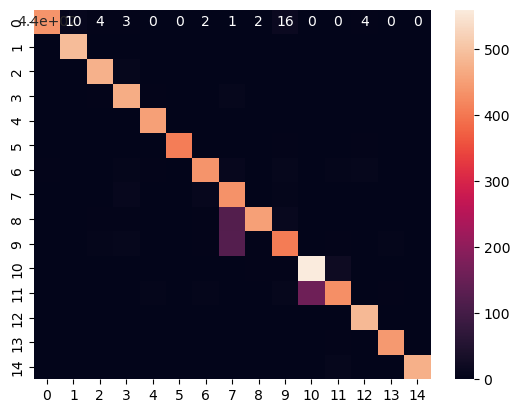

In [48]:

sns.heatmap(cn, annot= True)

In [49]:
import numpy as np
import tensorflow as tf


In [50]:
!pip install opencv-python

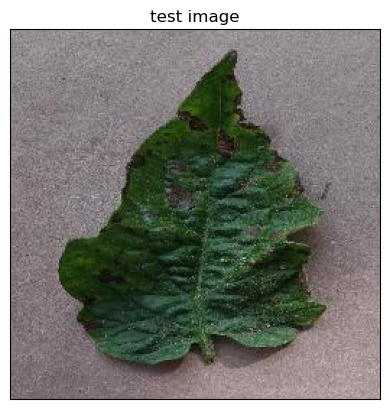

In [51]:
import cv2
image_path = r"C:\Users\HP\Downloads\minor_proj\TomatoEarlyBlight3.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [52]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)


(1, 128, 128, 3)


In [53]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


(array([[2.0745292e-05, 5.0034502e-04, 7.1201116e-06, 2.6740794e-04,
         1.1282430e-03, 9.8986289e-05, 4.7492567e-01, 3.9144349e-04,
         2.4942878e-01, 6.8475689e-05, 5.3477883e-02, 1.8599771e-01,
         1.9163860e-02, 1.3938900e-02, 5.8446720e-04]], dtype=float32),
 (1, 15))

In [54]:
result_index = np.argmax(prediction)
result_index

6

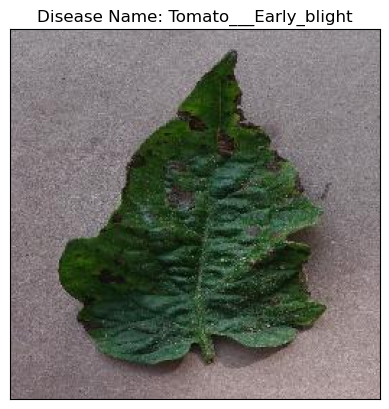

In [55]:
model_prediction = class_name[result_index]
model_prediction
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()